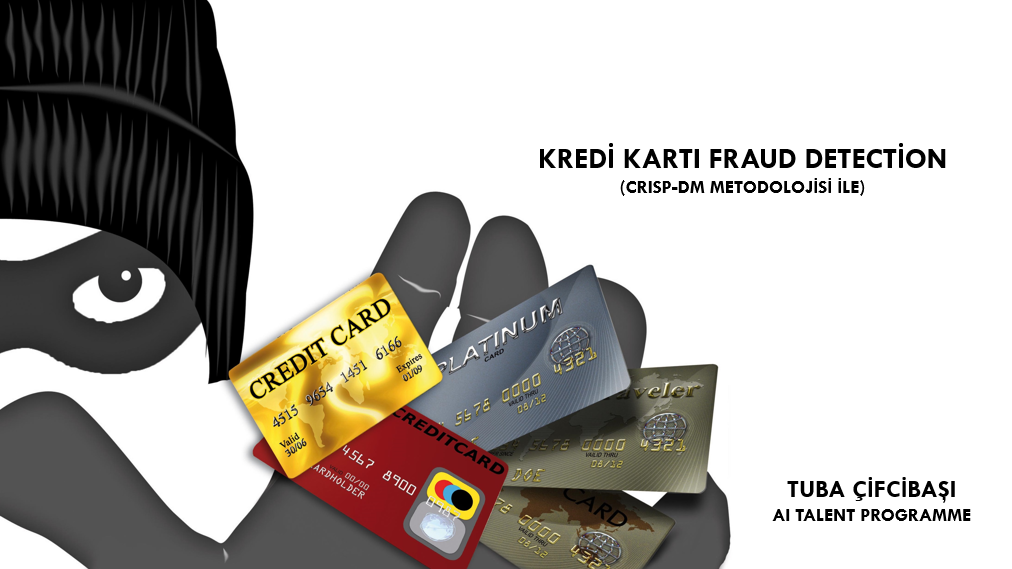

# Cross-Industry Standard Process For Data Mining

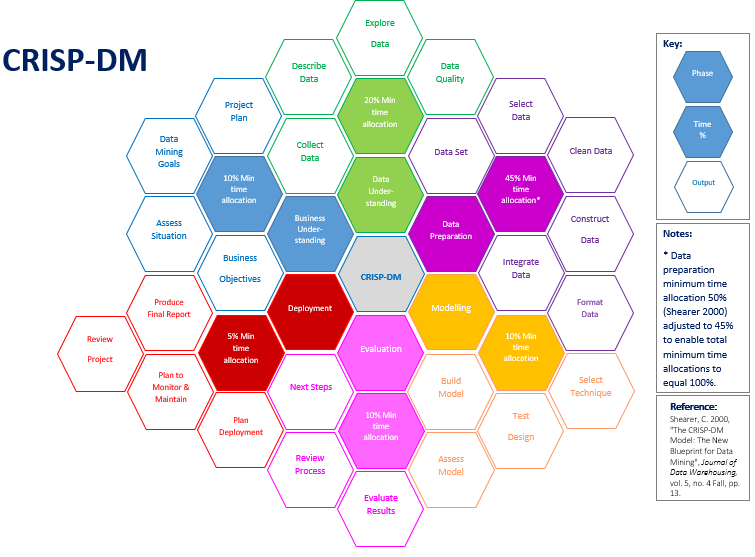

# Business Understanding

Eylül 2013 tarihindeki Avrupalı kart sahipleri tarafından yapılan kredi kartı işlemlerini içeren, Kaggle platformu içerisinden alınan veri seti üzerinden uygun parametreler ve öğrenme algoritmaları ile fraud işlemlerinin tahmin edilmesi hedeflenmiştir.

In [24]:
#Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Data Understanding

In [4]:
#Veri yükleme
data = pd.read_csv('creditcard.csv')
display(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [36]:
#Veri analizi - pandas profiling
import pandas_profiling as pp
profile = data.profile_report(title='Kredi Kartı İşlemleri Profil Raporu', pool_size = 0)
profile.to_file(output_file="output.html")

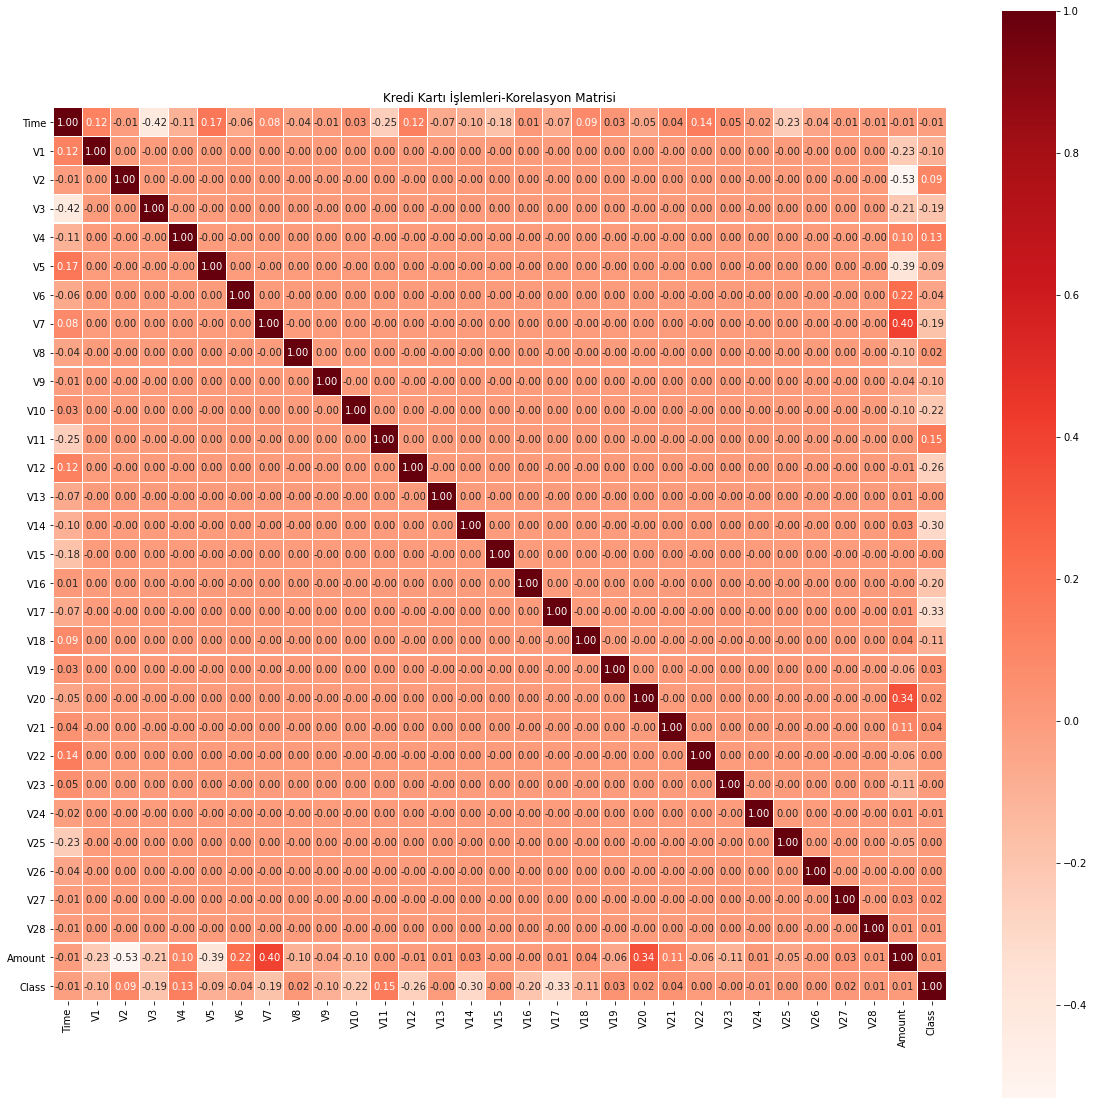

In [5]:
#Korelasyon matrisi
plt.figure(figsize = (20,20))
plt.title('Kredi Kartı İşlemleri-Korelasyon Matrisi')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds",cbar=True, annot=True, square=True, fmt='.2f')
plt.show()

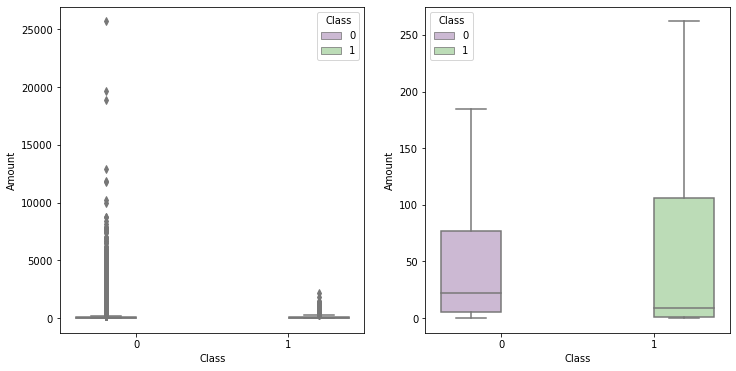

In [6]:
#Box plot - Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show();


# Data Preparation

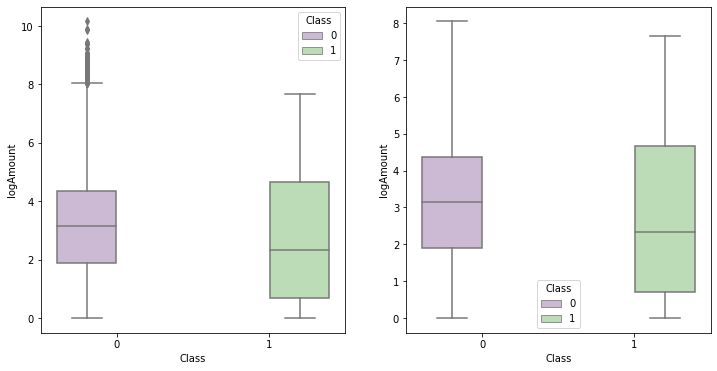

In [7]:
#Amount kolonundaki outlier ve skewness için logaritması alınıp basıklaştırılması
data['logAmount'] = np.log(data['Amount']-(min(data['Amount'])-1))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="logAmount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="logAmount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

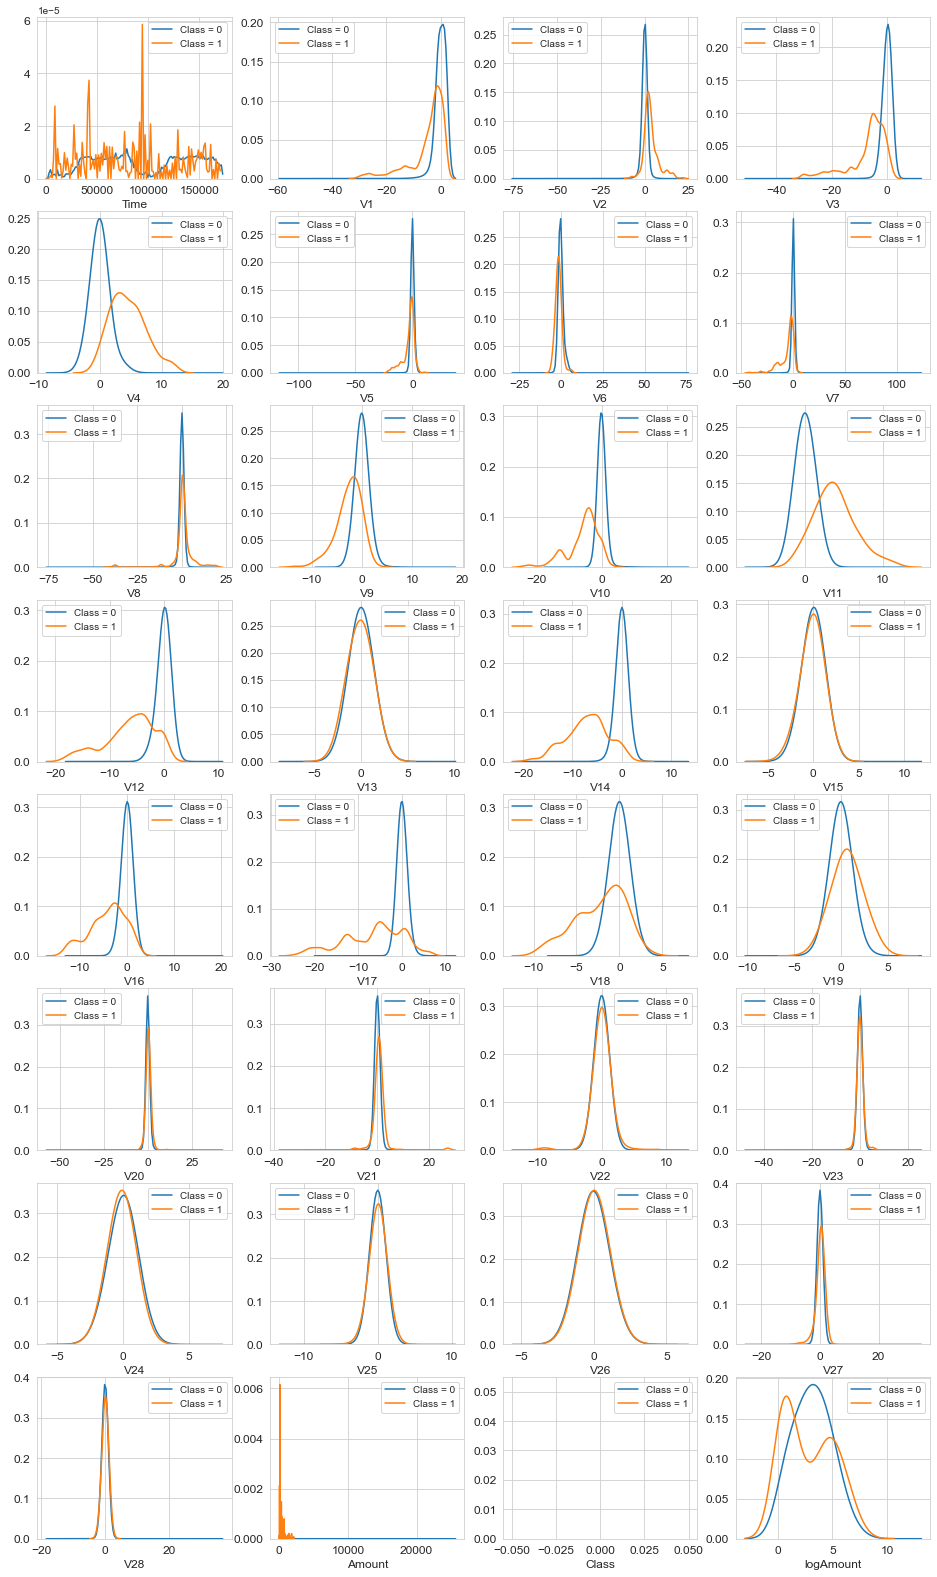

In [8]:
#Fraud - Non Fraud 
var = data.columns.values
i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=1,label="Class = 0")
    sns.kdeplot(t1[feature], bw=1,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [9]:
#Yeni data
yeni_data = data.drop(columns = ['Amount','logAmount','V15','V24','V25','V26','Time'], axis=1)

Text(0, 0.5, 'Frequency')

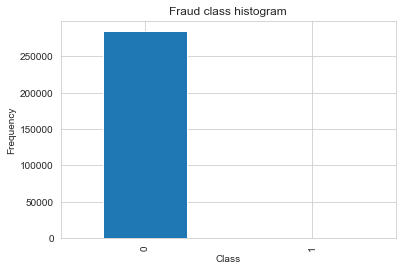

In [10]:
#Histogram - Class
count_classes = pd.value_counts(yeni_data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


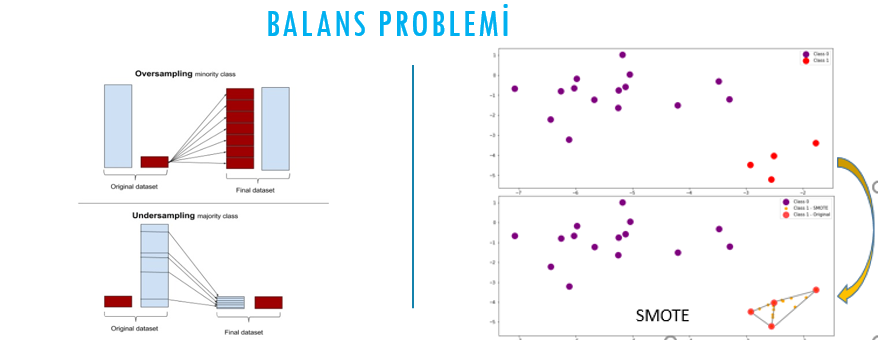

In [16]:
# ***** UNDER SAMPLING YÖNTEMİ *****

# Azınlık sınıftaki veri sayısı (FRAUD)
number_records_fraud = len(yeni_data[yeni_data.Class == 1])
fraud_indices = np.array(yeni_data[yeni_data.Class == 1].index)
#Normal sınıftaki indeksler
normal_indices = yeni_data[yeni_data.Class == 0].index
# Fraud olmayan datada ratgeler seçim yapılır
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
# Fraud ve fraud olmayan data birleştirilir
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
# Under sample olarak üretilen data dataset haline geitirilir.
under_sample_data = yeni_data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

#Verilerin test ve train olarak ayrılması
from sklearn.model_selection import train_test_split
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample ,y_undersample,test_size = 0.3,random_state = 0)

# verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_undersample = sc.fit_transform(X_train_undersample)
X_test_undersample  = sc.fit_transform(X_test_undersample)

#Under sampling uygulanmış dataset
print("Train dataset: ", len(X_train_undersample))
print("Test dataset: ", len(X_test_undersample))
print("Toplam dataset: ", len(X_train_undersample)+len(X_test_undersample))


Train dataset:  688
Test dataset:  296
Toplam dataset:  984


In [12]:
# ***** SMOTE YÖNTEMİ *****

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

#Verinin bağılmlı ve bağımsız değişkenler olarak ayrılması
x_smote = yeni_data.drop(columns = ['Class'], axis=1)
x_smote.describe()
y_smote = yeni_data.Class
y_smote.describe()

#Verilerin train ve test olarak ayrılması
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 0)
# verilerin Ölceklenmesi
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train_smote, y_train_smote.ravel())
X_train_res = x_train_res
Y_train_res = y_train_res

#SMOTE uygulanmış dataset
print("Train dataset: ", len(X_train_res))
print("Test dataset: ", len(x_test_smote))
print("Toplam dataset: ", len(X_train_res)+len(x_test_smote))

Train dataset:  398038
Test dataset:  85443
Toplam dataset:  483481


Text(0, 0.5, 'Frequency')

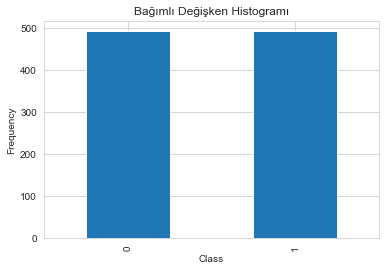

In [13]:
#Bağımlı Değişken Boxplot göstermi
count_classes = pd.value_counts(under_sample_data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title(u"Bağımlı Değişken Histogramı")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [14]:
# Confusion Matrix Func
classes=np.array(['0','1'])
def plot_confusion_matrix(cm,
                          title,
                          cmap=plt.cm.Blues):
    classes=np.array(['0','1'])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+' Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=30)

    plt.tight_layout()
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')

# Modeling

In [32]:
def modeling(balance,X_train,y_train,X_test,y_test):
    print(balance)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["LR","RFC", "XGB", "NB"]
    LR = LogisticRegression(random_state = 0)
    RFC = RandomForestClassifier(n_estimators = 40 , criterion='entropy')
    XGB = XGBClassifier(random_state = 0)
    NB = GaussianNB()

    for clf,i in zip([LR, RFC, XGB, NB], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (metrics.roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))
        
        #precision-recall curve
        precision, recall, thresholds_pr = metrics.precision_recall_curve(y_test, y_pred_prob)
        avg_pre = metrics.average_precision_score(y_test, y_pred_prob)
        ax1.plot(precision, recall, label = i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Precision', fontsize = 14)
        ax1.set_ylabel('Recall', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = metrics.roc_curve(y_test, y_pred_prob)
        roc_auc = metrics.auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()

Under Sampling
######################### LR #########################
Training Accuracy = 0.948
Test Accuracy = 0.932
ROC_AUC_score : 0.932155
[[145   4]
 [ 16 131]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       149
           1       0.97      0.89      0.93       147

    accuracy                           0.93       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296

######################### RFC #########################
Training Accuracy = 1.000
Test Accuracy = 0.943
ROC_AUC_score : 0.942268
[[147   2]
 [ 15 132]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       149
           1       0.99      0.90      0.94       147

    accuracy                           0.94       296
   macro avg       0.95      

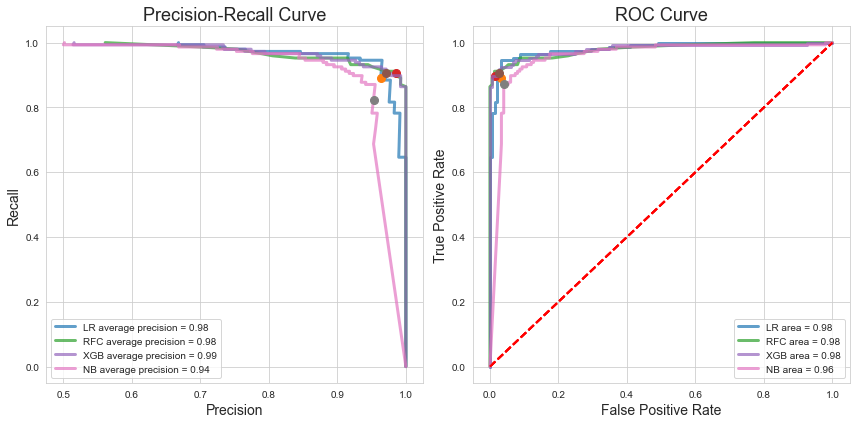

In [33]:
# Under Sampling Yönt
modeling("Under Sampling",X_train_undersample,y_train_undersample.values.ravel(),X_test_undersample,y_test_undersample)

Smote
######################### LR #########################
Training Accuracy = 0.942
Test Accuracy = 0.974
ROC_AUC_score : 0.942886
[[83096  2200]
 [   13   134]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.91      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

######################### RFC #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.914884
[[85282    14]
 [   25   122]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.83      0.86       147

    accuracy                           1.00     85443
   macro avg       0.9

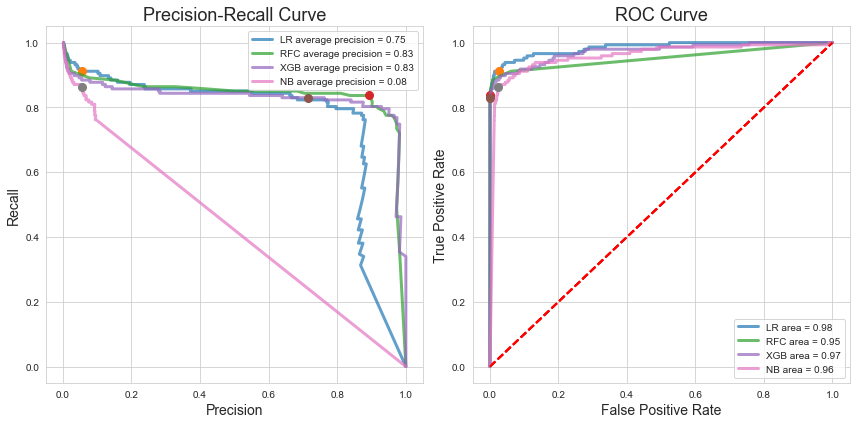

In [34]:
#Smote Yönt
modeling("Smote",X_train_res,Y_train_res,x_test_smote,y_test_smote)

## 5) Neural Networks 

Epoch 1/20
688/688 [==============================] - 0s 154us/step - loss: 2.7854 - accuracy: 0.4985
Epoch 2/20
688/688 [==============================] - 0s 36us/step - loss: 2.0112 - accuracy: 0.4985
Epoch 3/20
688/688 [==============================] - 0s 39us/step - loss: 1.7186 - accuracy: 0.4985
Epoch 4/20
688/688 [==============================] - 0s 33us/step - loss: 1.4126 - accuracy: 0.4985
Epoch 5/20
688/688 [==============================] - 0s 33us/step - loss: 1.1235 - accuracy: 0.4985
Epoch 6/20
688/688 [==============================] - 0s 32us/step - loss: 0.8614 - accuracy: 0.5974
Epoch 7/20
688/688 [==============================] - 0s 31us/step - loss: 0.6505 - accuracy: 0.6642
Epoch 8/20
688/688 [==============================] - 0s 29us/step - loss: 0.5269 - accuracy: 0.6715
Epoch 9/20
688/688 [==============================] - 0s 29us/step - loss: 0.4404 - accuracy: 0.6570
Epoch 10/20
688/688 [==============================] - 0s 28us/step - loss: 0.3805 - accur

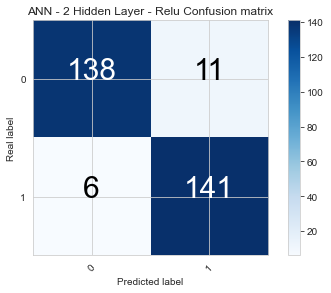

In [55]:
#RELU func - Under Sampling
classifier = Sequential()
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train_undersample, y_train_undersample, epochs=20)

# Predict
y_pred = classifier.predict(X_test_undersample)
y_pred = (y_pred > 0.25)
score, acc = classifier.evaluate(X_train_undersample, y_train_undersample,batch_size=10)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_undersample, y_pred)
plot_confusion_matrix(cm,'ANN - 2 Hidden Layer - Relu')

Epoch 1/15
688/688 [==============================] - 0s 151us/step - loss: 2.3724 - accuracy: 0.4985
Epoch 2/15
688/688 [==============================] - 0s 38us/step - loss: 1.6304 - accuracy: 0.4985
Epoch 3/15
688/688 [==============================] - 0s 35us/step - loss: 1.3932 - accuracy: 0.4985
Epoch 4/15
688/688 [==============================] - 0s 42us/step - loss: 1.1967 - accuracy: 0.4985
Epoch 5/15
688/688 [==============================] - 0s 32us/step - loss: 1.0239 - accuracy: 0.4985
Epoch 6/15
688/688 [==============================] - 0s 31us/step - loss: 0.8708 - accuracy: 0.4985
Epoch 7/15
688/688 [==============================] - 0s 26us/step - loss: 0.7632 - accuracy: 0.5203
Epoch 8/15
688/688 [==============================] - 0s 30us/step - loss: 0.6254 - accuracy: 0.5610
Epoch 9/15
688/688 [==============================] - 0s 28us/step - loss: 0.5362 - accuracy: 0.6744
Epoch 10/15
688/688 [==============================] - 0s 28us/step - loss: 0.5057 - accur

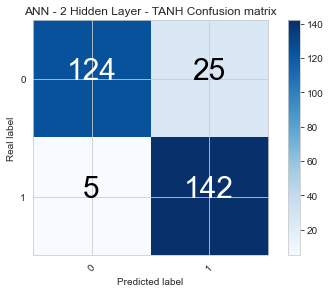

In [56]:
#TANH func - Under Sampling
classifier = Sequential()
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 24))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train_undersample, y_train_undersample, epochs=15)

# Predict
y_pred = classifier.predict(X_test_undersample)
y_pred = (y_pred > 0.25)
score, acc = classifier.evaluate(X_train_undersample, y_train_undersample,batch_size=10)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_undersample, y_pred)
plot_confusion_matrix(cm,'ANN - 2 Hidden Layer - TANH')

Epoch 1/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.1179 - accuracy: 0.5511
Epoch 2/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0888 - accuracy: 0.5487
Epoch 3/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0725 - accuracy: 0.5536
Epoch 4/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0661 - accuracy: 0.5611
Epoch 5/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0492 - accuracy: 0.5621
Epoch 6/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0471 - accuracy: 0.5541
Epoch 7/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0466 - accuracy: 0.5555
Epoch 8/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0445 - accuracy: 0.5583
Epoch 9/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0768 - accuracy: 0.5542
Epoch 10/30
398038/398038 [==========

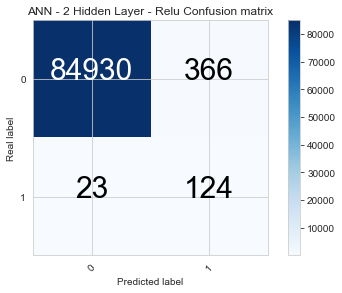

In [36]:
#RELU func - Smote
classifier = Sequential()
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train_res, Y_train_res, epochs=30)

# Predict
y_pred = classifier.predict(x_test_smote)
y_pred = (y_pred > 0.25)
score, acc = classifier.evaluate(X_train_res, Y_train_res,batch_size=10)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, y_pred)
plot_confusion_matrix(cm,'ANN - 2 Hidden Layer - Relu')

Epoch 1/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.1523 - accuracy: 0.7754
Epoch 2/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0771 - accuracy: 0.6458
Epoch 3/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0416 - accuracy: 0.5475
Epoch 4/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0307 - accuracy: 0.5219
Epoch 5/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0289 - accuracy: 0.5158
Epoch 6/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0200 - accuracy: 0.5130
Epoch 7/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0177 - accuracy: 0.5091
Epoch 8/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0156 - accuracy: 0.5077
Epoch 9/30
398038/398038 [==============================] - 9s 23us/step - loss: 0.0146 - accuracy: 0.5068
Epoch 10/30
398038/398038 [==========

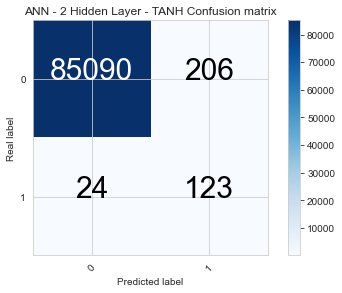

In [37]:
#TANH func - Smote
classifier = Sequential()
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 24))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train_res, Y_train_res, epochs=30)

# Predict
y_pred = classifier.predict(x_test_smote)
y_pred = (y_pred > 0.25)
score, acc = classifier.evaluate(X_train_res, Y_train_res,batch_size=10)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, y_pred)
plot_confusion_matrix(cm,'ANN - 2 Hidden Layer - TANH')